In [1]:
import pandas as pd
parquet_filename = "detection_results_validation.parquet"
df = pd.read_parquet(f"../parquets/{parquet_filename}")

In [2]:
df

filename  classid     score  \
0       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.401814   
1       /workspace/yolo_v8_training/oiv7_full/validati...        2  0.500673   
2       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.931938   
3       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.914084   
4       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.865071   
...                                                   ...      ...       ...   
113237  /workspace/yolo_v8_training/oiv7_full/validati...        1  0.793295   
113238  /workspace/yolo_v8_training/oiv7_full/validati...        2  0.568887   
113239  /workspace/yolo_v8_training/oiv7_full/validati...        3  0.450863   
113240  /workspace/yolo_v8_training/oiv7_full/validati...        0  0.414001   
113241  /workspace/yolo_v8_training/oiv7_full/validati...        1  0.522194   

         x1   y1    x2   y2  
0       121  256   162  285  
1       158  360   259  422  
2       349    5   698  613  
3         9   94   328  589  
4       693  156  1017  884  
...     ...  ...   ...  ...  
113237  305  244   358  325  
113238  318  348   349  389  
113239  312  277   344  319  
113240  724  468   765  548  
113241  725  468   746  490  

[113242 rows x 7 columns]

# Preprocess

In [3]:
# Mapping of values
mapping = {0: 'person', 1: 'head', 2: 'hand', 3: 'face'}

# Apply the mapping
df['label'] = df['classid'].map(mapping)

# List of values to filter by
filter_list = ['person', 'face']

# Filtering the DataFrame
df = df[df['label'].isin(filter_list)]


# filename_filter = ['/workspace/yolo_v8_training/oiv7_full/train/fba14789f51d7b37.jpg']
# df = df[df['filename'].isin(filename_filter)]

df

filename  classid     score  \
0       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.401814   
2       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.931938   
3       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.914084   
4       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.865071   
11      /workspace/yolo_v8_training/oiv7_full/validati...        3  0.619101   
...                                                   ...      ...       ...   
113231  /workspace/yolo_v8_training/oiv7_full/validati...        0  0.929375   
113235  /workspace/yolo_v8_training/oiv7_full/validati...        3  0.919208   
113236  /workspace/yolo_v8_training/oiv7_full/validati...        0  0.908642   
113239  /workspace/yolo_v8_training/oiv7_full/validati...        3  0.450863   
113240  /workspace/yolo_v8_training/oiv7_full/validati...        0  0.414001   

         x1   y1    x2    y2   label  
0       121  256   162   285  person  
2       349    5   698   613  person  
3         9   94   328   589  person  
4       693  156  1017   884  person  
11      930  357   982   415    face  
...     ...  ...   ...   ...     ...  
113231    7    2   694  1024  person  
113235  257   68   437   319    face  
113236  238  253   372   583  person  
113239  312  277   344   319    face  
113240  724  468   765   548  person  

[60650 rows x 8 columns]

In [4]:
df

filename  classid     score  \
0       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.401814   
2       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.931938   
3       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.914084   
4       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.865071   
11      /workspace/yolo_v8_training/oiv7_full/validati...        3  0.619101   
...                                                   ...      ...       ...   
113231  /workspace/yolo_v8_training/oiv7_full/validati...        0  0.929375   
113235  /workspace/yolo_v8_training/oiv7_full/validati...        3  0.919208   
113236  /workspace/yolo_v8_training/oiv7_full/validati...        0  0.908642   
113239  /workspace/yolo_v8_training/oiv7_full/validati...        3  0.450863   
113240  /workspace/yolo_v8_training/oiv7_full/validati...        0  0.414001   

         x1   y1    x2    y2   label  
0       121  256   162   285  person  
2       349    5   698   613  person  
3         9   94   328   589  person  
4       693  156  1017   884  person  
11      930  357   982   415    face  
...     ...  ...   ...   ...     ...  
113231    7    2   694  1024  person  
113235  257   68   437   319    face  
113236  238  253   372   583  person  
113239  312  277   344   319    face  
113240  724  468   765   548  person  

[60650 rows x 8 columns]

In [5]:
# Convert bounding boxes
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2
df['w'] = df['x2'] - df['x1']
df['h'] = df['y2'] - df['y1']

/tmp/ipykernel_46766/1172413626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cx'] = (df['x1'] + df['x2']) / 2
/tmp/ipykernel_46766/1172413626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cy'] = (df['y1'] + df['y2']) / 2
/tmp/ipykernel_46766/1172413626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [6]:
df

filename  classid     score  \
0       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.401814   
2       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.931938   
3       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.914084   
4       /workspace/yolo_v8_training/oiv7_full/validati...        0  0.865071   
11      /workspace/yolo_v8_training/oiv7_full/validati...        3  0.619101   
...                                                   ...      ...       ...   
113231  /workspace/yolo_v8_training/oiv7_full/validati...        0  0.929375   
113235  /workspace/yolo_v8_training/oiv7_full/validati...        3  0.919208   
113236  /workspace/yolo_v8_training/oiv7_full/validati...        0  0.908642   
113239  /workspace/yolo_v8_training/oiv7_full/validati...        3  0.450863   
113240  /workspace/yolo_v8_training/oiv7_full/validati...        0  0.414001   

         x1   y1    x2    y2   label     cx     cy    w     h  
0       121  256   162   285  person  141.5  270.5   41    29  
2       349    5   698   613  person  523.5  309.0  349   608  
3         9   94   328   589  person  168.5  341.5  319   495  
4       693  156  1017   884  person  855.0  520.0  324   728  
11      930  357   982   415    face  956.0  386.0   52    58  
...     ...  ...   ...   ...     ...    ...    ...  ...   ...  
113231    7    2   694  1024  person  350.5  513.0  687  1022  
113235  257   68   437   319    face  347.0  193.5  180   251  
113236  238  253   372   583  person  305.0  418.0  134   330  
113239  312  277   344   319    face  328.0  298.0   32    42  
113240  724  468   765   548  person  744.5  508.0   41    80  

[60650 rows x 12 columns]

In [7]:
df = df[['filename', 'score', 'cx', 'cy', 'w', 'h', 'label']]
df

filename     score     cx  \
0       /workspace/yolo_v8_training/oiv7_full/validati...  0.401814  141.5   
2       /workspace/yolo_v8_training/oiv7_full/validati...  0.931938  523.5   
3       /workspace/yolo_v8_training/oiv7_full/validati...  0.914084  168.5   
4       /workspace/yolo_v8_training/oiv7_full/validati...  0.865071  855.0   
11      /workspace/yolo_v8_training/oiv7_full/validati...  0.619101  956.0   
...                                                   ...       ...    ...   
113231  /workspace/yolo_v8_training/oiv7_full/validati...  0.929375  350.5   
113235  /workspace/yolo_v8_training/oiv7_full/validati...  0.919208  347.0   
113236  /workspace/yolo_v8_training/oiv7_full/validati...  0.908642  305.0   
113239  /workspace/yolo_v8_training/oiv7_full/validati...  0.450863  328.0   
113240  /workspace/yolo_v8_training/oiv7_full/validati...  0.414001  744.5   

           cy    w     h   label  
0       270.5   41    29  person  
2       309.0  349   608  person  
3       341.5  319   495  person  
4       520.0  324   728  person  
11      386.0   52    58    face  
...       ...  ...   ...     ...  
113231  513.0  687  1022  person  
113235  193.5  180   251    face  
113236  418.0  134   330  person  
113239  298.0   32    42    face  
113240  508.0   41    80  person  

[60650 rows x 7 columns]

In [8]:
df.rename(columns={'cx': 'col_x', 'cy': 'row_y', 'w': 'width', 'h': 'height'}, inplace=True)
df

/tmp/ipykernel_46766/324714309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'cx': 'col_x', 'cy': 'row_y', 'w': 'width', 'h': 'height'}, inplace=True)


filename     score  col_x  \
0       /workspace/yolo_v8_training/oiv7_full/validati...  0.401814  141.5   
2       /workspace/yolo_v8_training/oiv7_full/validati...  0.931938  523.5   
3       /workspace/yolo_v8_training/oiv7_full/validati...  0.914084  168.5   
4       /workspace/yolo_v8_training/oiv7_full/validati...  0.865071  855.0   
11      /workspace/yolo_v8_training/oiv7_full/validati...  0.619101  956.0   
...                                                   ...       ...    ...   
113231  /workspace/yolo_v8_training/oiv7_full/validati...  0.929375  350.5   
113235  /workspace/yolo_v8_training/oiv7_full/validati...  0.919208  347.0   
113236  /workspace/yolo_v8_training/oiv7_full/validati...  0.908642  305.0   
113239  /workspace/yolo_v8_training/oiv7_full/validati...  0.450863  328.0   
113240  /workspace/yolo_v8_training/oiv7_full/validati...  0.414001  744.5   

        row_y  width  height   label  
0       270.5     41      29  person  
2       309.0    349     608  person  
3       341.5    319     495  person  
4       520.0    324     728  person  
11      386.0     52      58    face  
...       ...    ...     ...     ...  
113231  513.0    687    1022  person  
113235  193.5    180     251    face  
113236  418.0    134     330  person  
113239  298.0     32      42    face  
113240  508.0     41      80  person  

[60650 rows x 7 columns]

# Verify Bbox Conversion

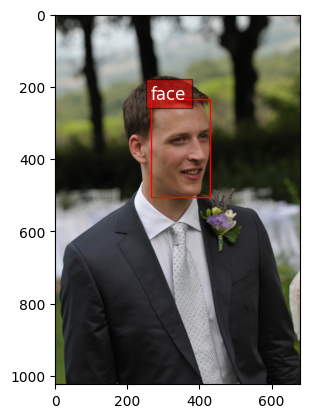

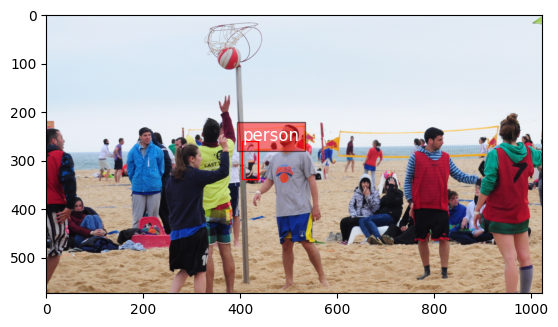

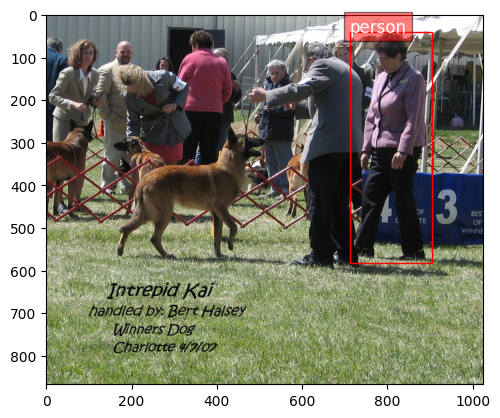

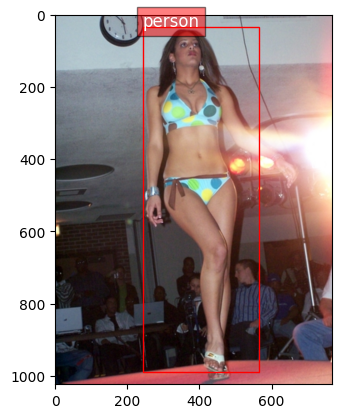

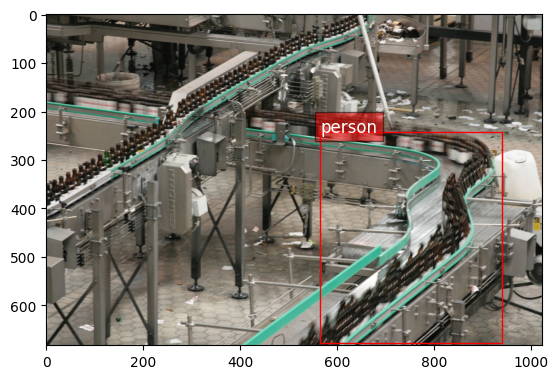

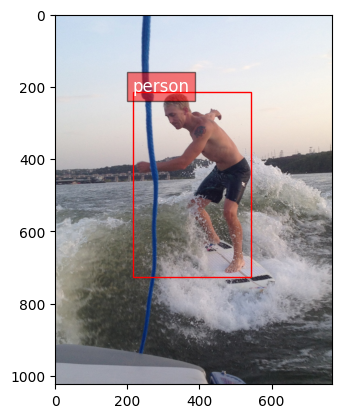

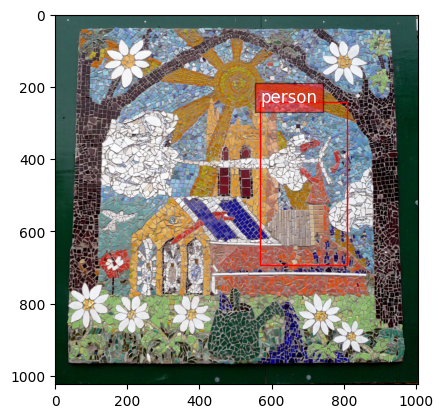

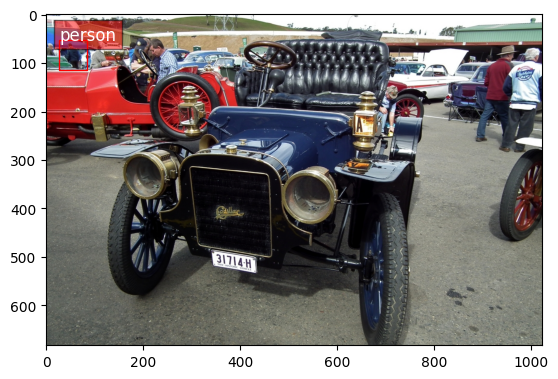

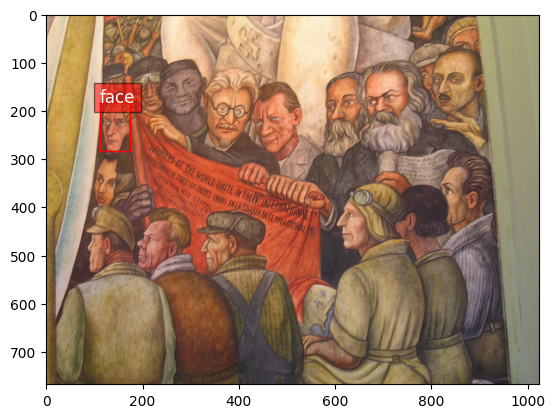

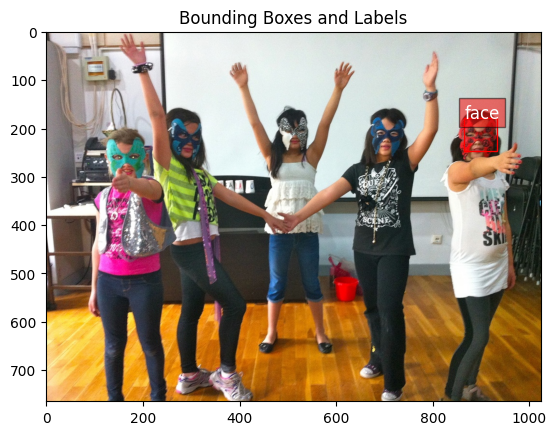

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

df_check = df.sample(10)

for index, row in df_check.iterrows():
    fig, ax = plt.subplots()
    # Assuming all images have the same dimensions for this example
    # Adjust accordingly if they differ
    # image_width = 1024
    # image_height = 1024
    # ax.set_xlim(0, image_width)
    # ax.set_ylim(0, image_height)
    # ax.invert_yaxis()  # Invert y axis to match image coordinates


    # Calculate the bottom left corner of the bounding box
    x = row['col_x'] - row['width'] / 2
    y = row['row_y'] - row['height'] / 2
    
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), row['width'], row['height'], linewidth=1, edgecolor='r', facecolor='none', label=row['label'])
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    # Add label
    plt.text(x, y, row['label'], color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    img = plt.imread(row['filename'])
    ax.imshow(img)

plt.title('Bounding Boxes and Labels')
plt.show()


In [10]:
annotation_df = df.copy()

# Run fastdup 

In [12]:
import fastdup
fd = fastdup.create(input_dir='./')
fd.run(annotations=df, ccthreshold=0.9, overwrite=True, license='magical')

/root/miniforge-pypy3/envs/py310env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/root/miniforge-pypy3/envs/py310env/lib/python3.10/site-packages/fastdup/fastdup_controller.py:849: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._df_annot[FD.ANNOT_FD_ID] = np.arange(len(self._df_annot)).astype(int)


FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2024-02-21 11:22:31 [INFO] Going to loop over dir /tmp/tmpauw6h0i_.csv
2024-02-21 11:22:32 [INFO] Found total 60650 images to run on, 60650 train, 0 test, name list 60650, counter 60650 
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.tess
2024-02-21 11:31:28 [INFO] Going to loop over dir /tmp/crops_input.csv
2024-02-21 11:31:28 [INFO] Found total 39478 images to run on, 39478 train, 0 test, name list 39478, counter 39478 
2024-02-21 11:34:44 [INFO] Found total 39478 images to run onimated: 0 Minutes
Finished histogram 10.383
Finished bucket sort 10.734
2024-02-21 11:34:51 [INFO] 6501) Finished write_index() NN model
2024-02-21 11:34:51 [INFO] Stored nn model index file work_dir/nnf.index
2024-02-21 11:34:54 [INFO] Total time took 205879 ms
2024-02-21 11:34:54 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 % of total graph edges
2024-02-21 11:34:54 [INFO] Fou

0

In [13]:
outliers_df = fd.outliers()
outliers_df

outlier  nearest  distance  score_outlier  col_x_outlier  row_y_outlier  width_outlier  height_outlier label_outlier                                                                                  crop_filename_outlier                                                                                       filename_outlier  index_x  is_valid_outlier  score_nearest  col_x_nearest  row_y_nearest  width_nearest  height_nearest label_nearest                                                                                  crop_filename_nearest                                                                                       filename_nearest  index_y  is_valid_nearest
0       32170    20818  0.525677       0.423845          523.0          328.0            196             216        person  work_dir/crops/3/workspaceyolo_v8_trainingoiv7_fullvalidationcc51c1e48a46852f.jpg_523_328_196_216.jpg  work_dir/crops/3/workspaceyolo_v8_trainingoiv7_fullvalidationcc51c1e48a46852f.jpg_523_328_196_216.jpg  32170.0              True       0.444692          687.0          447.5            240             275        person  work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidation84017a2704ed9b56.jpg_687_447_240_275.jpg  work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidation84017a2704ed9b56.jpg_687_447_240_275.jpg  20818.0              True
1        5238    13278  0.533479       0.601371          679.0          336.0            294             192        person  work_dir/crops/0/workspaceyolo_v8_trainingoiv7_fullvalidation20145f1d7c0b8b4e.jpg_679_336_294_192.jpg  work_dir/crops/0/workspaceyolo_v8_trainingoiv7_fullvalidation20145f1d7c0b8b4e.jpg_679_336_294_192.jpg   5238.0              True       0.697145          276.5          225.0            111             116          face  work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation52e01fd58bfeea97.jpg_276_225_111_116.jpg  work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation52e01fd58bfeea97.jpg_276_225_111_116.jpg  13278.0              True
2       31693    12144  0.542094       0.472198          650.0          353.0            234             348        person  work_dir/crops/3/workspaceyolo_v8_trainingoiv7_fullvalidationc930e686bab1c829.jpg_650_353_234_348.jpg  work_dir/crops/3/workspaceyolo_v8_trainingoiv7_fullvalidationc930e686bab1c829.jpg_650_353_234_348.jpg  31693.0              True       0.675892          423.5           90.0            169             180        person   work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation4cacf91612e0c25d.jpg_423_90_169_180.jpg   work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation4cacf91612e0c25d.jpg_423_90_169_180.jpg  12144.0              True
3       27710    18739  0.543609       0.429060          334.5          232.0            473             464        person  work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidationb01589c7d77a1463.jpg_334_232_473_464.jpg  work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidationb01589c7d77a1463.jpg_334_232_473_464.jpg  27710.0              True       0.844015          647.0           77.0            126             154        person   work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation77487c61b3d0f1e3.jpg_647_77_126_154.jpg   work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation77487c61b3d0f1e3.jpg_647_77_126_154.jpg  18739.0              True
4       10429    25864  0.564555       0.412093          875.0           99.5             68             183        person    work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation40d42dd62c70d764.jpg_875_99_68_183.jpg    work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation40d42dd62c70d764.jpg_875_99_68_183.jpg  10429.0              True       0.398939          679.0          561.0             84              90        person    work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidationa3f9af725f6cf30d.jpg_679_561_84_90.jpg    work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidati

In [14]:
annotation_df

filename     score  col_x  row_y  width  height   label
0       /workspace/yolo_v8_training/oiv7_full/validation/0001eeaf4aed83f9.jpg  0.401814  141.5  270.5     41      29  person
2       /workspace/yolo_v8_training/oiv7_full/validation/00075905539074f2.jpg  0.931938  523.5  309.0    349     608  person
3       /workspace/yolo_v8_training/oiv7_full/validation/00075905539074f2.jpg  0.914084  168.5  341.5    319     495  person
4       /workspace/yolo_v8_training/oiv7_full/validation/00075905539074f2.jpg  0.865071  855.0  520.0    324     728  person
11      /workspace/yolo_v8_training/oiv7_full/validation/00075905539074f2.jpg  0.619101  956.0  386.0     52      58    face
...                                                                       ...       ...    ...    ...    ...     ...     ...
113231  /workspace/yolo_v8_training/oiv7_full/validation/ffe36e4c06a8add6.jpg  0.929375  350.5  513.0    687    1022  person
113235  /workspace/yolo_v8_training/oiv7_full/validation/ffe36e4c06a8add6.jpg  0.919208  347.0  193.5    180     251    face
113236  /workspace/yolo_v8_training/oiv7_full/validation/ffeac105c9e17568.jpg  0.908642  305.0  418.0    134     330  person
113239  /workspace/yolo_v8_training/oiv7_full/validation/ffeac105c9e17568.jpg  0.450863  328.0  298.0     32      42    face
113240  /workspace/yolo_v8_training/oiv7_full/validation/fff277539bd8a2be.jpg  0.414001  744.5  508.0     41      80  person

[60650 rows x 7 columns]

# Visualize Outliers

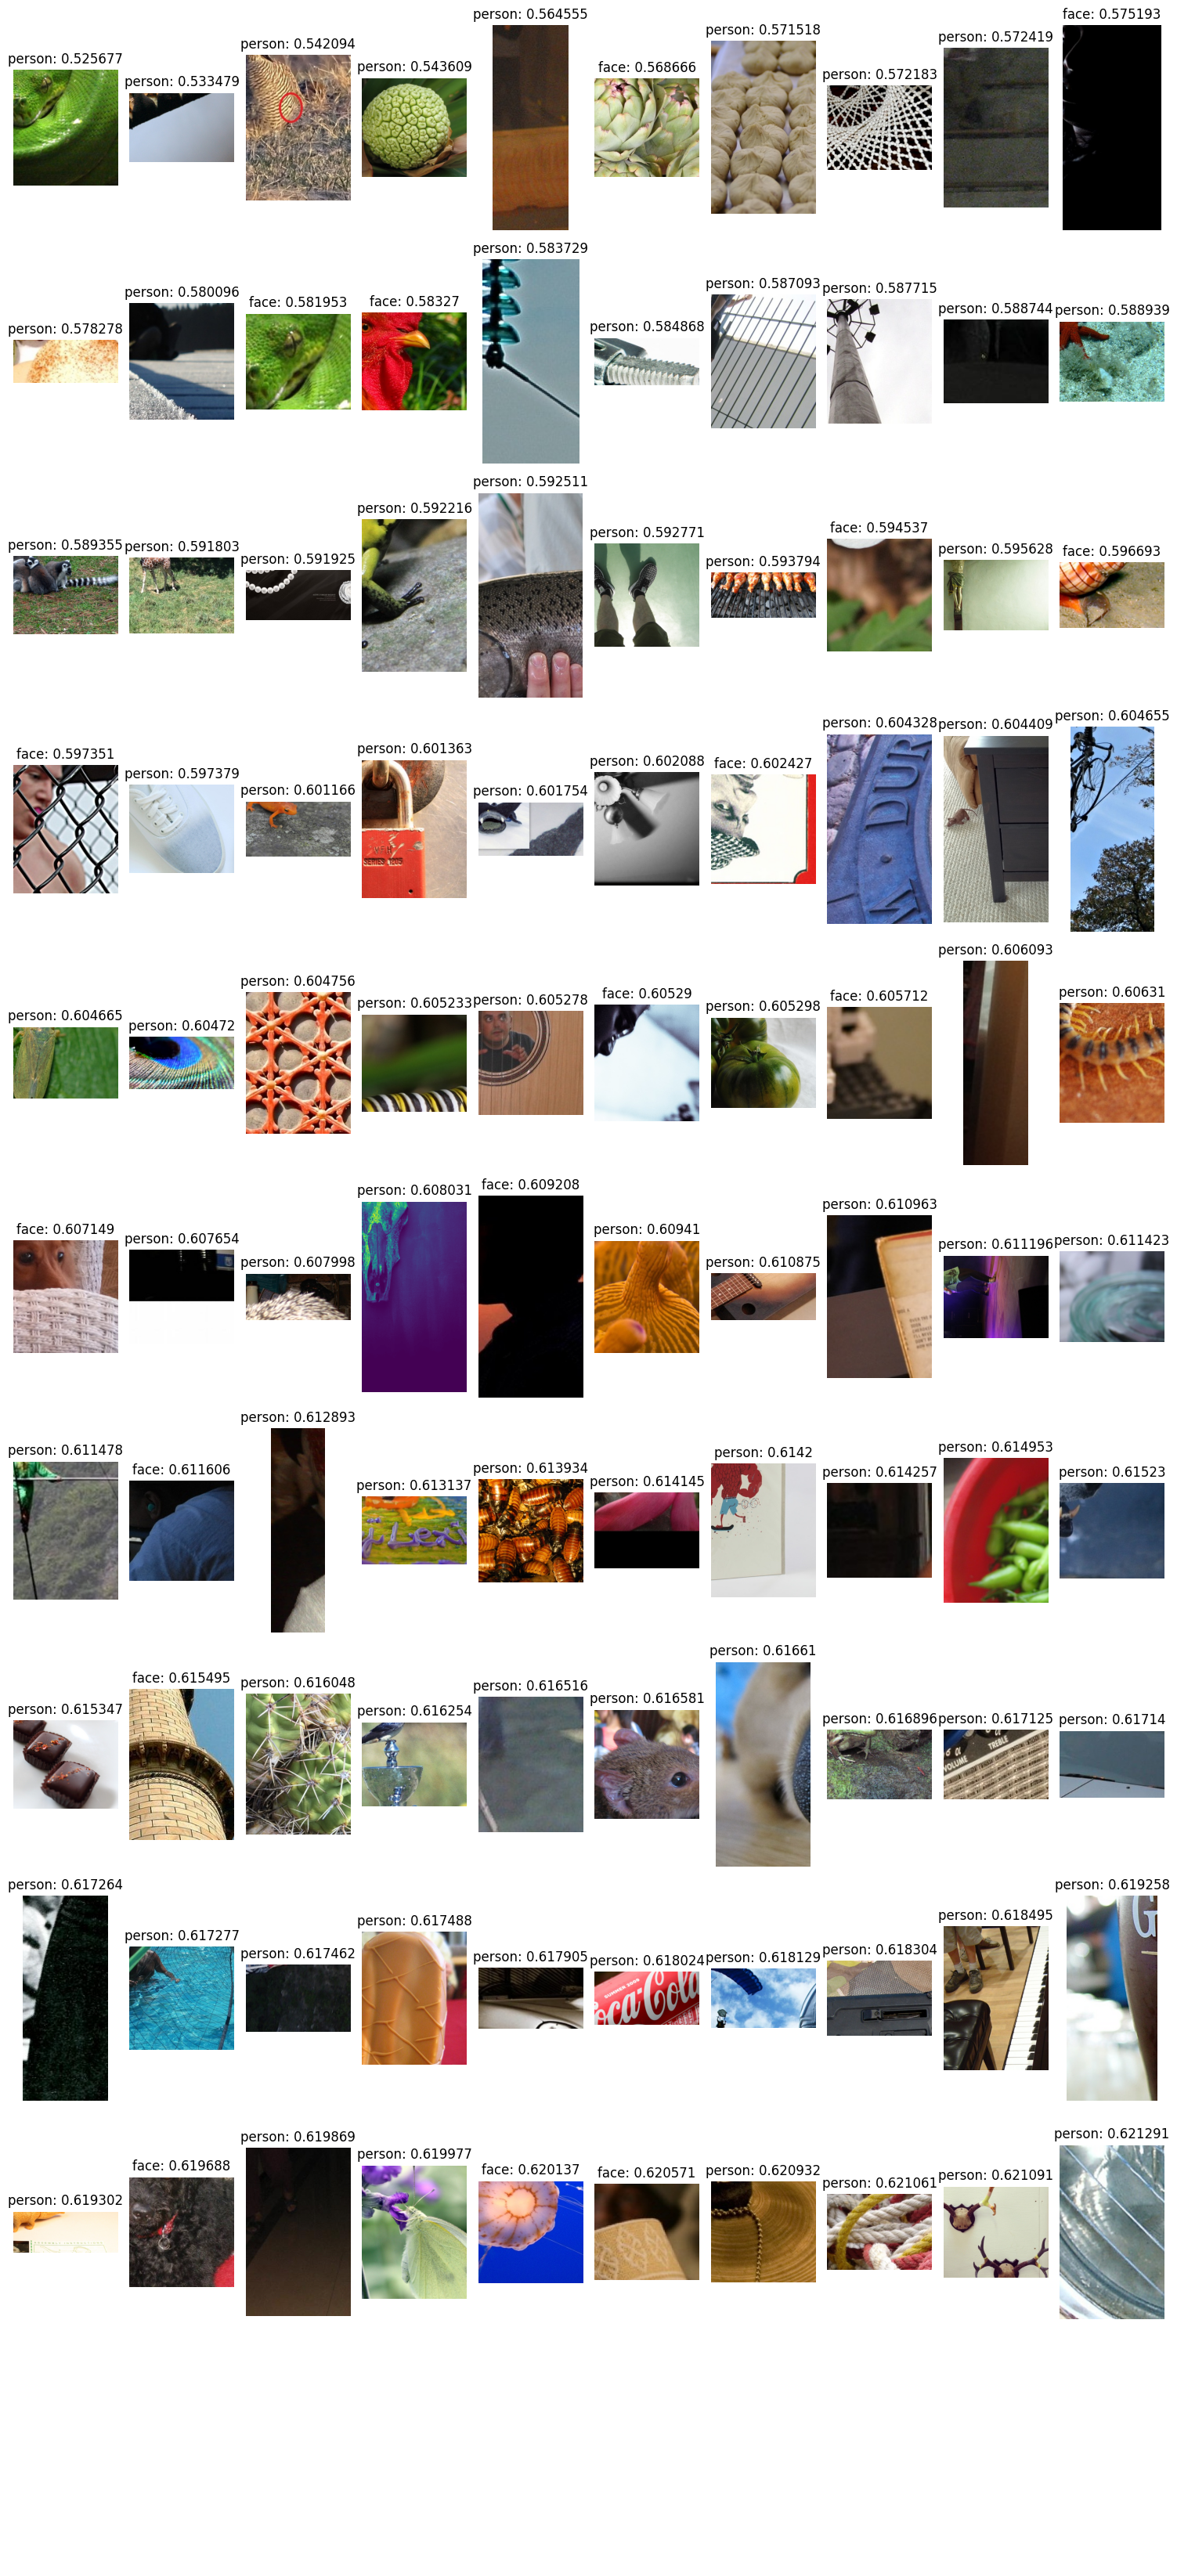

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_df = outliers_df.head(100)

# Determine the size of the grid. You might want to adjust ncols and nrows based on your actual dataframe size
nrows = int(len(sample_df)**0.5) + 1  # Simple way to estimate rows needed
ncols = int(len(sample_df) / nrows) + (len(sample_df) % nrows > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))  # Adjust figsize as needed

# Flatten the axes array for easy iteration if it's 2D (for multiple rows and cols)
axes = axes.flatten()

for idx, (index, row) in enumerate(sample_df.iterrows()):
    ax = axes[idx]
    image = mpimg.imread(row['crop_filename_outlier'])
    ax.imshow(image)
    ax.set_title(f"{row['label_outlier']}: {row['distance']}")
    ax.axis('off')  # Hide axes ticks

# Turn off any unused subplots
for ax in axes[idx+1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Drop Outliers

In [17]:
# Anything lower than 0.65 are considered to be outliers

outliers_df = outliers_df[outliers_df['distance'] < 0.65]
outliers_df

outlier  nearest  distance  score_outlier  col_x_outlier  row_y_outlier  width_outlier  height_outlier label_outlier                                                                                  crop_filename_outlier                                                                                       filename_outlier  index_x  is_valid_outlier  score_nearest  col_x_nearest  row_y_nearest  width_nearest  height_nearest label_nearest                                                                                  crop_filename_nearest                                                                                       filename_nearest  index_y  is_valid_nearest
0      32170    20818  0.525677       0.423845          523.0          328.0            196             216        person  work_dir/crops/3/workspaceyolo_v8_trainingoiv7_fullvalidationcc51c1e48a46852f.jpg_523_328_196_216.jpg  work_dir/crops/3/workspaceyolo_v8_trainingoiv7_fullvalidationcc51c1e48a46852f.jpg_523_328_196_216.jpg  32170.0              True       0.444692          687.0          447.5            240             275        person  work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidation84017a2704ed9b56.jpg_687_447_240_275.jpg  work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidation84017a2704ed9b56.jpg_687_447_240_275.jpg  20818.0              True
1       5238    13278  0.533479       0.601371          679.0          336.0            294             192        person  work_dir/crops/0/workspaceyolo_v8_trainingoiv7_fullvalidation20145f1d7c0b8b4e.jpg_679_336_294_192.jpg  work_dir/crops/0/workspaceyolo_v8_trainingoiv7_fullvalidation20145f1d7c0b8b4e.jpg_679_336_294_192.jpg   5238.0              True       0.697145          276.5          225.0            111             116          face  work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation52e01fd58bfeea97.jpg_276_225_111_116.jpg  work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation52e01fd58bfeea97.jpg_276_225_111_116.jpg  13278.0              True
2      31693    12144  0.542094       0.472198          650.0          353.0            234             348        person  work_dir/crops/3/workspaceyolo_v8_trainingoiv7_fullvalidationc930e686bab1c829.jpg_650_353_234_348.jpg  work_dir/crops/3/workspaceyolo_v8_trainingoiv7_fullvalidationc930e686bab1c829.jpg_650_353_234_348.jpg  31693.0              True       0.675892          423.5           90.0            169             180        person   work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation4cacf91612e0c25d.jpg_423_90_169_180.jpg   work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation4cacf91612e0c25d.jpg_423_90_169_180.jpg  12144.0              True
3      27710    18739  0.543609       0.429060          334.5          232.0            473             464        person  work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidationb01589c7d77a1463.jpg_334_232_473_464.jpg  work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidationb01589c7d77a1463.jpg_334_232_473_464.jpg  27710.0              True       0.844015          647.0           77.0            126             154        person   work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation77487c61b3d0f1e3.jpg_647_77_126_154.jpg   work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation77487c61b3d0f1e3.jpg_647_77_126_154.jpg  18739.0              True
4      10429    25864  0.564555       0.412093          875.0           99.5             68             183        person    work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation40d42dd62c70d764.jpg_875_99_68_183.jpg    work_dir/crops/1/workspaceyolo_v8_trainingoiv7_fullvalidation40d42dd62c70d764.jpg_875_99_68_183.jpg  10429.0              True       0.398939          679.0          561.0             84              90        person    work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidationa3f9af725f6cf30d.jpg_679_561_84_90.jpg    work_dir/crops/2/workspaceyolo_v8_trainingoiv7_fullvalidationa3f

In [18]:
outliers_df.rename(columns={'score_outlier':'score', 
                            'col_x_outlier':'col_x', 
                            'row_y_outlier':'row_y', 
                            'width_outlier':'width', 
                            'height_outlier':'height', 
                            'label_outlier':'label', 
                            'distance': 'outlier_distance'}, inplace=True)

outliers_df = outliers_df[['score',	'col_x','row_y','width','height','label', 'outlier_distance']] 
outliers_df

/tmp/ipykernel_46766/3292701937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.rename(columns={'score_outlier':'score',


score  col_x  row_y  width  height   label  outlier_distance
0    0.423845  523.0  328.0    196     216  person          0.525677
1    0.601371  679.0  336.0    294     192  person          0.533479
2    0.472198  650.0  353.0    234     348  person          0.542094
3    0.429060  334.5  232.0    473     464  person          0.543609
4    0.412093  875.0   99.5     68     183  person          0.564555
..        ...    ...    ...    ...     ...     ...               ...
334  0.501529  463.0  146.0    430     288  person          0.649911
335  0.620137  438.0  236.5    162     209  person          0.649930
336  0.669695  736.0  400.5    124     275  person          0.649939
337  0.641264  514.0  315.5     88     109  person          0.649958
338  0.585040  315.5  173.5     79      73    face          0.649977

[339 rows x 7 columns]

In [19]:
# Perform the merge with an indicator and include 'distance' from outliers_df
merged_df = annotation_df.merge(outliers_df, on=['col_x', 'row_y', 'width', 'height', 'label', 'score'], how='left', indicator=True)

# Create the 'outlier' column based on the '_merge' indicator
merged_df['outlier'] = merged_df['_merge'] == 'both'

# After the merge, 'distance' column from outliers_df is included in merged_df.
# Rows from annotation_df without a match in outliers_df will have NaN values in 'distance'.

# Drop the '_merge' column as it's no longer needed
merged_df = merged_df.drop('_merge', axis=1)

# Optional: Reset the index
merged_df = merged_df.reset_index(drop=True)

# The resulting dataframe now includes 'distance' and a new 'outlier' column marking true for outliers
updated_annotations = merged_df


In [20]:
updated_annotations

filename     score  col_x  row_y  width  height   label  outlier_distance  outlier
0      /workspace/yolo_v8_training/oiv7_full/validation/0001eeaf4aed83f9.jpg  0.401814  141.5  270.5     41      29  person               NaN    False
1      /workspace/yolo_v8_training/oiv7_full/validation/00075905539074f2.jpg  0.931938  523.5  309.0    349     608  person               NaN    False
2      /workspace/yolo_v8_training/oiv7_full/validation/00075905539074f2.jpg  0.914084  168.5  341.5    319     495  person               NaN    False
3      /workspace/yolo_v8_training/oiv7_full/validation/00075905539074f2.jpg  0.865071  855.0  520.0    324     728  person               NaN    False
4      /workspace/yolo_v8_training/oiv7_full/validation/00075905539074f2.jpg  0.619101  956.0  386.0     52      58    face               NaN    False
...                                                                      ...       ...    ...    ...    ...     ...     ...               ...      ...
60645  /workspace/yolo_v8_training/oiv7_full/validation/ffe36e4c06a8add6.jpg  0.929375  350.5  513.0    687    1022  person               NaN    False
60646  /workspace/yolo_v8_training/oiv7_full/validation/ffe36e4c06a8add6.jpg  0.919208  347.0  193.5    180     251    face               NaN    False
60647  /workspace/yolo_v8_training/oiv7_full/validation/ffeac105c9e17568.jpg  0.908642  305.0  418.0    134     330  person               NaN    False
60648  /workspace/yolo_v8_training/oiv7_full/validation/ffeac105c9e17568.jpg  0.450863  328.0  298.0     32      42    face               NaN    False
60649  /workspace/yolo_v8_training/oiv7_full/validation/fff277539bd8a2be.jpg  0.414001  744.5  508.0     41      80  person               NaN    False

[60650 rows x 9 columns]

In [22]:
updated_annotations.to_parquet(f"../parquets/clean_{parquet_filename}")

In [ ]:
# !rm -r work_dir